<a href="https://colab.research.google.com/github/XiaonaZhou/data_analytics_2/blob/main/Python/Unit_4/Linear_Regression_Boston_Housing_Guided_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Linear Regression on Boston Housing Dataset

## Data Background and Problem Statement
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.Open-source ML library for Python. Built on NumPy, SciPy, and Matplotlib. ... Scikit-learn is a library in Python that provides many unsupervised and supervised learning algorithms.

# Task 1 : Environment Set up

In [1]:
#import required libraries
import numpy as np
import pandas as pd

# Task 2 : Data Collection

In [2]:
# import the boston dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
# create a pandas dataframe and store the data
df_boston = pd.DataFrame(boston_dataset.data)
df_boston.columns = boston_dataset.feature_names

In [4]:
# append Price, target, as a new columnn to the dataset
df_boston['Price'] = boston_dataset.target

In [5]:
# print top 5 observations
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


We want first to check to see if we have missing data ,we use isnull().sum()

In [6]:
df_boston.isnull().sum() #sum to count of the NaN values For one column

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


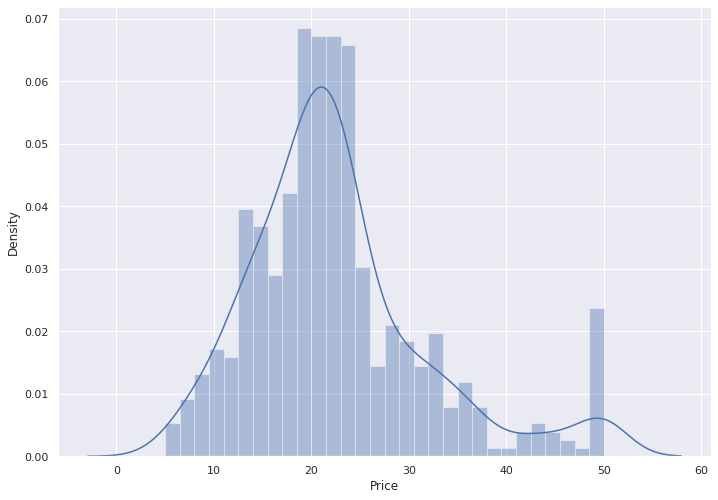

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})#. rc parameter set aesthetics of your plots 
# set figure size by passing dictionary to rc parameter with key 'figure.figsize' in seaborn set method:
sns.distplot(df_boston['Price'], bins=30)
plt.show()

#  Create a correlation matrix that measures the linear relationships between the variables

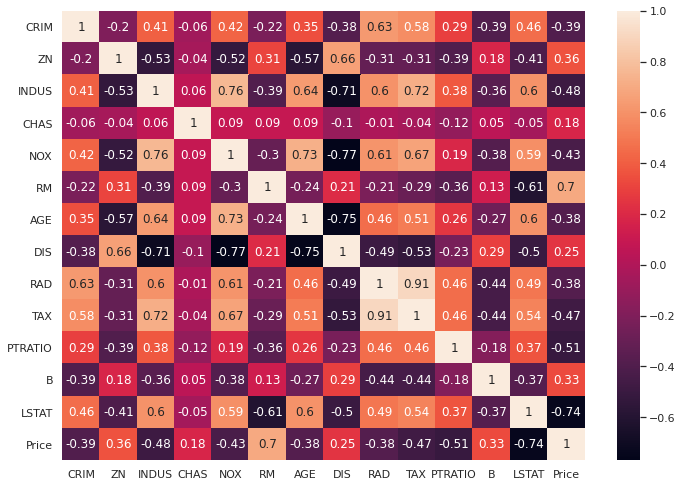

In [9]:
correlation_matrix = df_boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix , annot=True)# put the numbers on

In [10]:
correlation_matrix[correlation_matrix>0.7]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INDUS,NaN,NaN,1.00,NaN,0.76,NaN,NaN,NaN,NaN,0.72,NaN,NaN,NaN,NaN
CHAS,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,NaN,NaN,0.76,NaN,1.00,NaN,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RM,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,NaN,NaN,0.73,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
RAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.91,NaN,NaN,NaN,NaN
TAX,NaN,NaN,0.72,NaN,NaN,NaN,NaN,NaN,0.91,1.00,NaN,NaN,NaN,NaN


# Write Your Observations

1. From the `density plot` in line 8, we see that the distribution of price is close to normal distribution centered around 20. 

2. In line 15, we see that there is very strong correlation between `TAX` and `RAD`.There are strong correlation between `NOX` and `INDUS`, and `AGE` and `NOX`. 

# Preparing the data for training the Machine Learning Model

In [11]:
# assign features on X axis 
X_features = boston_dataset.data

In [12]:
# assign target on Y axis 
Y_target = boston_dataset.target

# Build Linear Regression Model

In [13]:
# import linear model - the estimator
from sklearn.linear_model import LinearRegression
lineReg = LinearRegression()

In [14]:
# fit data into the the estimator
lineReg.fit(X_features,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# print the intercept 
print('the estimated intercept %.2f '%lineReg.intercept_)

the estimated intercept 36.46 


In [16]:
# print the coefficient 
print('the coefficient is %d ' %len(lineReg.coef_))

the coefficient is 13 


# Model Training

In [17]:
# train model split the whole dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_features,Y_target)

In [18]:
# print the dataset shape
print(boston_dataset.data.shape)

(506, 13)


In [19]:
# Print shapes of the training and testing data sets
print( X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [20]:
# fit the training sets into the model
lineReg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Caluclate RMSE and R-squared:


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
y_train_predict = lineReg.predict(X_train)

In [23]:
rmse = np.sqrt(mean_squared_error(Y_train,y_train_predict)) # calculate RMSE

In [24]:
r2 = r2_score(Y_train, y_train_predict) # calculate R squared values
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.512101266909464
R2 score is 0.7435380307154151




In [25]:
# model evaluation for testing set

y_test_predict = lineReg.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 5.250603918431604
R2 score is 0.7227698698164534


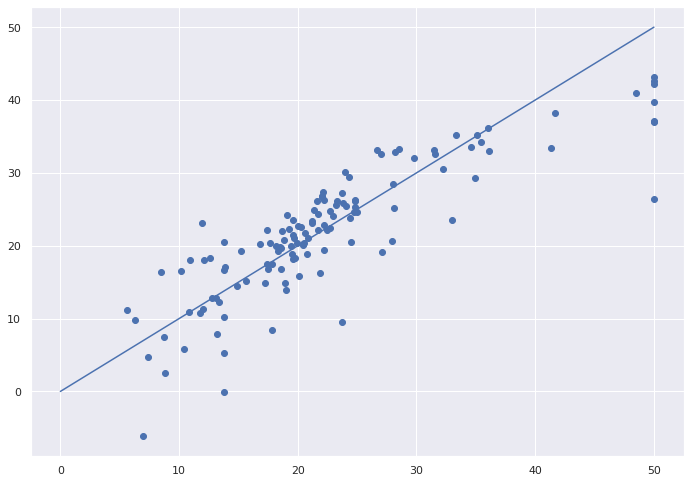

In [26]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test,y_test_predict)
plt.plot(np.linspace(0,50,100),np.linspace(0,50,100))
plt.show()

# Your Conclusion 

1. R-squared score was lower on the test data than training data as expected. 

2. Since the scores on training and testing sets are closed, we say that our mdoel did not suffer from bia or variance.  

3. Since our predictions and the true values did not line up on diagnal, and R-squared values was only 0.69 on test set, we may want to try other ML models oon this dataset and see if we can obtain a better mdoel. 